In [1]:

%pprint

Pretty printing has been turned OFF


In [2]:

%run ../load_magic/storage.py
s = Storage()
[f's.{fn}' for fn in dir(s) if not fn.startswith('_')]

['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']

In [5]:

import gensim

[f'gensim.models.{fn}' for fn in dir(gensim.models) if 'word2vec' in fn.lower()]

['gensim.models.Word2Vec', 'gensim.models.word2vec', 'gensim.models.word2vec_corpusfile', 'gensim.models.word2vec_inner']

In [16]:

import re

SCANNER_REGEX = re.compile(r'(</?|\b)[1-9a-zA-Z][0-9a-zA-Z]*( *[#\+:]{1,2}|>|\.\b|\b)')
def regex_tokenizer(corpus):
    
    return [match.group() for match in re.finditer(SCANNER_REGEX, corpus)]

In [ ]:

print([f'child_str_model.{fn}' for fn in dir(child_str_model) if not fn.startswith('_')])
print([f'child_str_model.wv.{fn}' for fn in dir(child_str_model.wv) if not fn.startswith('_')])

In [92]:

import warnings

warnings.filterwarnings('ignore')

In [91]:
# %load ../load_magic/get_dir_tree.txt

def get_dir_tree(module_name, max_levels=2, contains_str=None):
    if max_levels < 1:
        return None
    base_eval_str = f"['{module_name}.{{}}'.format(fn) for fn in dir({module_name}) if not fn.startswith('_')]"
    if contains_str is None:
        eval_str = base_eval_str
    else:
        eval_str = f"['{module_name}.{{}}'.format(fn) for fn in dir({module_name}) if '{contains_str.lower()}' in fn.lower()]"
    try:
        dir_list = eval(eval_str)
        if len(dir_list):
            print()
            print(module_name)
            print(dir_list)
    except Exception as e:
        print(f'The evaluated list {eval_str} gets this error: {str(e).strip()}')
    try:
        base_dir_list = eval(base_eval_str)
        if len(base_dir_list):
            for base_module_name in base_dir_list:
                get_dir_tree(base_module_name, max_levels=max_levels-1, contains_str=contains_str)
    except:
        return None

In [105]:

from inspect import signature

module_name = 'gensim.models'
base_eval_str = f"['{module_name}.{{}}'.format(fn) for fn in dir({module_name}) if not fn.startswith('_')]"
base_dir_list = eval(base_eval_str)
for model_name in base_dir_list:
    sig_eval_str = f'signature({model_name})'
    try:
        sig = eval(sig_eval_str)
        params = sig.parameters
        if(list(params.keys())[0].strip() == 'sentences'):
            print()
            print(model_name)
            print(params)
    except Exception as e:
        #print(f'The evaluated list {sig_eval_str} gets this error: {str(e).strip()}')
        pass


gensim.models.FastText
OrderedDict([('sentences', <Parameter "sentences=None">), ('corpus_file', <Parameter "corpus_file=None">), ('sg', <Parameter "sg=0">), ('hs', <Parameter "hs=0">), ('size', <Parameter "size=100">), ('alpha', <Parameter "alpha=0.025">), ('window', <Parameter "window=5">), ('min_count', <Parameter "min_count=5">), ('max_vocab_size', <Parameter "max_vocab_size=None">), ('word_ngrams', <Parameter "word_ngrams=1">), ('sample', <Parameter "sample=0.001">), ('seed', <Parameter "seed=1">), ('workers', <Parameter "workers=3">), ('min_alpha', <Parameter "min_alpha=0.0001">), ('negative', <Parameter "negative=5">), ('ns_exponent', <Parameter "ns_exponent=0.75">), ('cbow_mean', <Parameter "cbow_mean=1">), ('hashfxn', <Parameter "hashfxn=<built-in function hash>">), ('iter', <Parameter "iter=5">), ('null_word', <Parameter "null_word=0">), ('min_n', <Parameter "min_n=3">), ('max_n', <Parameter "max_n=6">), ('sorted_vocab', <Parameter "sorted_vocab=1">), ('bucket', <Parameter "

In [106]:

BASIC_TAGS_DICT = s.load_object('BASIC_TAGS_DICT')
rows_list = [{'navigable_parent': navigable_parent, 'is_header': is_header} for navigable_parent, is_header in BASIC_TAGS_DICT.items()]
child_str_df = pd.DataFrame(rows_list)
sents_list = [regex_tokenizer(sent_str) for sent_str in child_str_df.navigable_parent.tolist()]
child_str_model = gensim.models.FastText(sents_list)

In [107]:

get_dir_tree('child_str_model', max_levels=3, contains_str='save')


child_str_model
['child_str_model._save_specials', 'child_str_model._smart_save', 'child_str_model.save']
The evaluated list ['child_str_model.syn1.{}'.format(fn) for fn in dir(child_str_model.syn1) if 'save' in fn.lower()] gets this error: 'FastTextTrainables' object has no attribute 'syn1'

child_str_model.trainables
['child_str_model.trainables._save_specials', 'child_str_model.trainables._smart_save', 'child_str_model.trainables.save']

child_str_model.vocabulary
['child_str_model.vocabulary._save_specials', 'child_str_model.vocabulary._smart_save', 'child_str_model.vocabulary.save']

child_str_model.wv
['child_str_model.wv._save_specials', 'child_str_model.wv._smart_save', 'child_str_model.wv.save', 'child_str_model.wv.save_word2vec_format']

child_str_model.wv.wv
['child_str_model.wv.wv._save_specials', 'child_str_model.wv.wv._smart_save', 'child_str_model.wv.wv.save', 'child_str_model.wv.wv.save_word2vec_format']


In [109]:

model_folder = os.path.join(s.data_folder, 'bin')
os.makedirs(name=model_folder, exist_ok=True)
file_path = os.path.join(model_folder, 'child_str_model.bin')
child_str_model.save(file_path)

In [ ]:

get_dir_tree('gensim', max_levels=3, contains_str='load')

In [112]:

file_path = os.path.join(model_folder, 'child_str_model.bin')
try:
    model = gensim.models.FastText.load(file_path)
except Exception as e:
    print(str(e).strip())

In [113]:

words = list(model.wv.vocab)
print(words)

['<div>', 'you', 'Yelp', 'of', 'and', 'business', 'all', 'are', 'is', 'to', 'the', 'or', 'in', '</div>', 'our', 'a', 'We', 'your', 'with', '<b>', '</b>', '<li>', '</li>', 'for', 'an', '<i>', '</i>', '<p>', '</p>']


In [114]:

print(model['</b>'])

[ 3.16559733e-03  4.59003844e-04  2.02944549e-03  9.73376882e-05
  5.74608101e-04  2.97815795e-03  2.04127072e-03  2.73369107e-04
 -2.66325223e-04  4.43897257e-03  2.50901887e-03 -4.04052297e-03
  2.48546821e-05  1.85793068e-03 -8.61687178e-04  3.41213949e-04
  3.11226794e-03 -1.08533772e-03 -3.47532536e-04  2.98735267e-03
  1.85359866e-04 -6.50101865e-04  8.90510157e-04  1.46537309e-03
  3.94867640e-03  4.88541787e-04  1.08212931e-03 -7.39823503e-04
 -1.32856297e-03 -1.07695919e-03 -1.22094702e-04 -2.35289917e-03
 -1.76874324e-04  1.03924125e-04 -1.78486214e-03 -8.96472833e-04
 -1.82678655e-03 -2.77179154e-03 -2.03277171e-03  3.69834452e-04
  4.58058435e-04  5.29359153e-04  1.16646755e-03  4.13486920e-03
  1.78172078e-03  2.50954344e-03  2.40132492e-03 -2.72369618e-03
  5.76260558e-04  2.22065340e-04  2.25788262e-03  1.80244120e-03
  1.24615955e-03 -1.10660575e-03  4.72492160e-04  2.58919178e-03
  2.71673989e-03  2.26415670e-03 -3.45842750e-03 -1.95123220e-03
  6.22306194e-04  5.68034

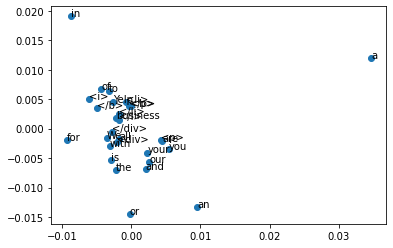

In [148]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
PathCollection_obj = plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(model.wv.vocab):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

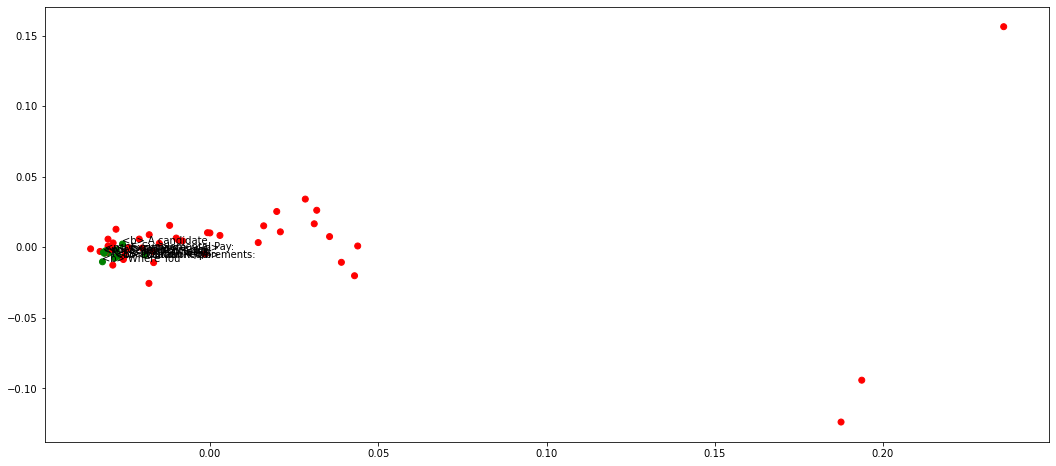

In [149]:

fig, ax = plt.subplots(figsize=(18, 8))
array_list = []
colors_list = ['g' if is_header else 'r' for is_header in child_str_df.is_header]
for i, words_list in enumerate(sents_list):
    vector_str = "'] + model['".join(words_list)
    command_str = f"model['{vector_str}']"
    array_list.append(eval(command_str))
X = np.stack(array_list)
result = pca.fit_transform(X)
PathCollection_obj = plt.scatter(result[:, 0], result[:, 1], c=colors_list)
for i, words_list in enumerate(sents_list):
    if(colors_list[i] == 'g'):
        sent = ' '.join([word for word in words_list[:3]])
        plt.annotate(sent, xy=(result[i, 0], result[i, 1]))

In [126]:

model['<b>'] + model['</b>']

array([ 1.13566825e-03, -1.19521806e-03,  2.02216883e-03,  4.19806689e-03,
        1.03950792e-03,  2.55431188e-03,  4.85989079e-03, -2.34203390e-03,
       -1.93312741e-03,  3.12384684e-03,  4.30097803e-04, -8.77971575e-03,
        2.37291935e-03,  4.81667649e-03, -6.72513095e-04, -2.77757482e-03,
        4.03882097e-03, -9.41429171e-04,  1.10824173e-03,  6.64661033e-03,
       -1.03053125e-03, -2.51794024e-03, -1.06864423e-03,  1.36952382e-03,
        4.27264953e-03, -7.38919480e-05,  2.73077306e-03, -4.07629227e-03,
       -1.49800512e-03, -3.66452010e-03, -6.18109363e-04, -3.90836783e-03,
       -8.96292273e-04, -1.45678234e-04, -7.01217586e-03, -3.08750104e-03,
       -6.04883069e-03, -2.30329321e-03,  1.25553226e-04,  3.37534491e-03,
        2.21362207e-04, -1.76350446e-03,  5.65739162e-03,  6.02672482e-03,
        1.00051158e-03,  4.52467846e-03,  7.39596365e-03, -2.52135424e-03,
        1.01900939e-03,  1.06829428e-03, -2.07741279e-04,  3.08264117e-03,
       -1.22742367e-03, -


----

In [28]:

review_folder = os.path.join(s.saves_folder, 'txt')
os.makedirs(name=review_folder, exist_ok=True)
file_path = os.path.join(review_folder, 'child_str_model.txt')
child_str_model.wv.save_word2vec_format(file_path, binary=False)

In [43]:

import pickle

[f'pickle.{fn}' for fn in dir(pickle) if 'err' in fn.lower()]

['pickle.PickleError', 'pickle.PicklingError', 'pickle.UnpicklingError']

In [38]:

[f'gensim.utils.{fn}' for fn in dir(gensim.utils) if not fn.startswith('_')]

['gensim.utils.ClippedCorpus', 'gensim.utils.FakeDict', 'gensim.utils.InputQueue', 'gensim.utils.NO_CYTHON', 'gensim.utils.PAT_ALPHABETIC', 'gensim.utils.RE_HTML_ENTITY', 'gensim.utils.RULE_DEFAULT', 'gensim.utils.RULE_DISCARD', 'gensim.utils.RULE_KEEP', 'gensim.utils.RepeatCorpus', 'gensim.utils.RepeatCorpusNTimes', 'gensim.utils.SaveLoad', 'gensim.utils.SlicedCorpus', 'gensim.utils.any2unicode', 'gensim.utils.any2utf8', 'gensim.utils.call_on_class_only', 'gensim.utils.check_output', 'gensim.utils.chunkize', 'gensim.utils.chunkize_serial', 'gensim.utils.collections', 'gensim.utils.contextmanager', 'gensim.utils.copytree_hardlink', 'gensim.utils.cpu_count', 'gensim.utils.deaccent', 'gensim.utils.decode_htmlentities', 'gensim.utils.deprecated', 'gensim.utils.dict_from_corpus', 'gensim.utils.effective_n_jobs', 'gensim.utils.file_or_filename', 'gensim.utils.flatten', 'gensim.utils.getNS', 'gensim.utils.get_max_id', 'gensim.utils.get_my_ip', 'gensim.utils.get_random_state', 'gensim.utils.g

In [41]:
# %load ../load_magic/pip_install.txt

import sys

# After this has completed, run these commands in a PowerShell window:
# cd $Env:UserProfile\Documents\Repositories\job-hunting\ps1
# clear
# .\create_job_hunting_temp_environment_yml_file.ps1
command_str = f'{sys.executable} -m pip install --upgrade xxxxxxx'
print(command_str)
!{command_str}

C:\Users\dev\Anaconda3\envs\jh\python.exe -m pip install --upgrade cPickle


ERROR: Could not find a version that satisfies the requirement cPickle (from versions: none)
ERROR: No matching distribution found for cPickle
